# Import

In [ ]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Configure Model

In [ ]:
base_model=MobileNetV2(input_shape=(224, 224, 3), weights='imagenet',include_top=False) #imports the MobileNetV2 model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x) # Add back pooling layer because the previous step removed it
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(5,activation='softmax', name="final_predicion")(x) #final layer with softmax activation for N classes

model=Model(inputs=base_model.input,outputs=preds) #specify the inputs and outputs

In [ ]:
for layer in model.layers[:-5]:
    layer.trainable=False
# for layer in model.layers[20:]:
#     layer.trainable=True

In [ ]:
# Purely theoretical model DOESNT WORK! DONT RUN
# base_model=MobileNetV2(input_shape=(224, 224, 3), weights='imagenet')
# x=base_model.output
# preds=Dense(5,activation='softmax')(x) #final layer with softmax activation for N classes
# model=Model(inputs=base_model.input,outputs=preds) #specify the inputs and outputs
# for layer in model.layers[:-1]:
#     layer.trainable=False

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

# Load Data / Prepare

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./augmented_224/train/',
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle=True)

Found 23478 images belonging to 5 classes.


In [ ]:
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=val_datagen.flow_from_directory('./augmented_224/val/',
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle=True)

Found 160 images belonging to 5 classes.


# Compile Model & Train

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_val=val_generator.n//val_generator.batch_size
model.fit_generator(generator=train_generator,
                  steps_per_epoch=step_size_train,
                  epochs=7, 
                  validation_data=val_generator,
                  validation_steps=step_size_val
                  )

Epoch 1/7
733/733 [==============================] - 32s 39ms/step - loss: 1.6007 - accuracy: 0.2444 - val_loss: 1.5925 - val_accuracy: 0.2625
Epoch 2/7
207/733 [=======>......................] - ETA: 18s - loss: 1.5842 - accuracy: 0.2760

KeyboardInterrupt: 

# Export Model

In [ ]:
model_json = model.to_json()
with open("./model_224/model.json", "w") as json_file:
    json_file.write(model_json)
    model.save_weights("weights.h5") # serialize weights to HDF5

In [ ]:
model.save('./model_224/')

INFO:tensorflow:Assets written to: ./model_224/assets


# Test Model

In [ ]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator=test_datagen.flow_from_directory('./augmented_224/test/',
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode=None,
                                                shuffle=False)

Found 20 images belonging to 1 classes.


In [ ]:
Y_pred = model.predict(test_generator, test_generator.n//test_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
print(test_generator.filenames)

['test\\test (1).jpg', 'test\\test (10).jpg', 'test\\test (11).jpg', 'test\\test (12).jpg', 'test\\test (13).jpg', 'test\\test (14).jpg', 'test\\test (15).jpg', 'test\\test (16).jpg', 'test\\test (17).jpg', 'test\\test (18).jpg', 'test\\test (19).jpg', 'test\\test (2).jpg', 'test\\test (20).jpg', 'test\\test (3).jpg', 'test\\test (4).jpg', 'test\\test (5).jpg', 'test\\test (6).jpg', 'test\\test (7).jpg', 'test\\test (8).jpg', 'test\\test (9).jpg']


In [ ]:
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont
import cv2

In [ ]:
def load_image_into_numpy_array(path):
  image = cv2.imread(path)
  resized_img = cv2.resize(image, (128, 128))
  np_image = np.array(resized_img).astype(np.uint8)
  return np_image

not using phone


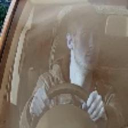

phone use


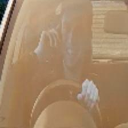

phone use


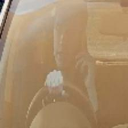

not using phone


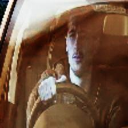

not using phone


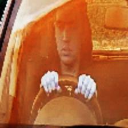

not using phone


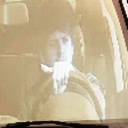

not using phone


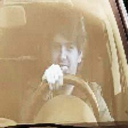

not using phone


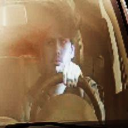

not using phone


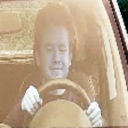

not using phone


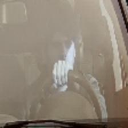

not using phone


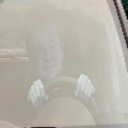

not using phone


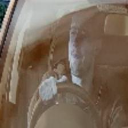

not using phone


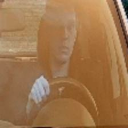

not using phone


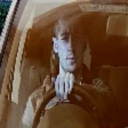

phone use


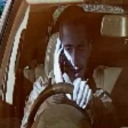

phone use


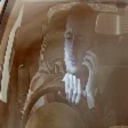

phone use


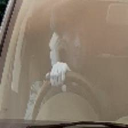

not using phone


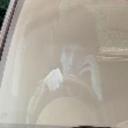

phone use


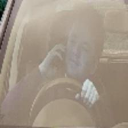

phone use


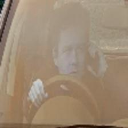

In [ ]:
i = 0
for img in test_generator.filenames:
    if (y_pred[i] == 0 or y_pred[i] == 1):
        print('phone use')
    else:
        print('not using phone')
    display(Image.fromarray(load_image_into_numpy_array(f'./augmented_224/test/{img}')))
    i += 1